In [429]:
import sys # импортируем библиотеки
import numpy
import math
import datetime
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import os
import re
import sys
import pandas as pd
import numpy as np
from Bio.Seq import Seq
import statistics
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from Bio import Entrez
from Bio import SeqIO
Entrez.email= "pavel-kravchenk0@yandex.ru"
from Bio.SeqUtils import GC
from time import clock
from dna_features_viewer import GraphicFeature, GraphicRecord, CircularGraphicRecord
from dna_features_viewer import BiopythonTranslator
import subprocess
import random
from random import randrange 
import argparse
from itertools import groupby
import itertools
from Bio.Alphabet import generic_dna
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Alphabet import IUPAC, Gapped
from Bio import Phylo
from Bio.Align.Applications import ClustalwCommandline
from sys import argv
from Bio import AlignIO
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
from scipy import stats
import matplotlib.pyplot as plt
import networkx as nx
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Data import CodonTable
from fuzzywuzzy import fuzz
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.codonalign.codonseq import _get_codon_list, CodonSeq, cal_dn_ds
from Bio.codonalign.codonalphabet import (default_codon_table, default_codon_alphabet)
from statistics import mean 
from sklearn.manifold import TSNE
import operator
from fuzzywuzzy import process 
from fuzzywuzzy import fuzz
import os, io, random
import string
from Bio.Align import MultipleSeqAlignment
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Plot, Grid, Range1d
from bokeh.models.glyphs import Text, Rect
from bokeh.layouts import gridplot

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

from Levenshtein import distance
import collections
import random
import statistics

In [560]:

#///////////////////////////////////
code_calc = {"UUU": 0, "UUC": 0, "UUA": 0, "UUG": 0, # словарь для хранения встреченных кодонов
    "UCU": 0, "UCC": 0, "UCA": 0, "UCG": 0,
    "UAU": 0, "UAC": 0, "UAA": 0, "UAG": 0,
    "UGU": 0, "UGC": 0, "UGA": 0, "UGG": 0,
    "CUU": 0, "CUC": 0, "CUA": 0, "CUG": 0,
    "CCU": 0, "CCC": 0, "CCA": 0, "CCG": 0,
    "CAU": 0, "CAC": 0, "CAA": 0, "CAG": 0,
    "CGU": 0, "CGC": 0, "CGA": 0, "CGG": 0,
    "AUU": 0, "AUC": 0, "AUA": 0, "AUG": 0,
    "ACU": 0, "ACC": 0, "ACA": 0, "ACG": 0,
    "AAU": 0, "AAC": 0, "AAA": 0, "AAG": 0,
    "AGU": 0, "AGC": 0, "AGA": 0, "AGG": 0,
    "GUU": 0, "GUC": 0, "GUA": 0, "GUG": 0,
    "GCU": 0, "GCC": 0, "GCA": 0, "GCG": 0,
    "GAU": 0, "GAC": 0, "GAA": 0, "GAG": 0,
    "GGU": 0, "GGC": 0, "GGA": 0, "GGG": 0}

SD = ({'A':0.29,'T':0.47,'G':0.11,'C':0.13}, # матрица с SD 
      {'A':0.42,'T':0.00,'G':0.15,'C':0.43},
      {'A':0.81,'T':0.11,'G':0.00,'C':0.08},
      {'A':0.00,'T':0.00,'G':1.0,'C':0.00},
      {'A':0.00,'T':0.00,'G':1.0,'C':0.00},
      {'A':0.97,'T':0.00,'G':0.02,'C':0.01},
      {'A':0.23,'T':0.07,'G':0.66,'C':0.04},)

code = {"UUU": "F", "UUC": "F", "UUA": "L", "UUG": "L", # словарь для перекодирования
    "UCU": "S", "UCC": "S", "UCA": "S", "UCG": "S",
    "UAU": "Y", "UAC": "Y", "UAA": "STOP", "UAG": "STOP",
    "UGU": "C", "UGC": "C", "UGA": "STOP", "UGG": "W",
    "CUU": "L", "CUC": "L", "CUA": "L", "CUG": "L",
    "CCU": "P", "CCC": "P", "CCA": "P", "CCG": "P",
    "CAU": "H", "CAC": "H", "CAA": "Q", "CAG": "Q",
    "CGU": "R", "CGC": "R", "CGA": "R", "CGG": "R",
    "AUU": "I", "AUC": "I", "AUA": "I", "AUG": "M",
    "ACU": "T", "ACC": "T", "ACA": "T", "ACG": "T",
    "AAU": "N", "AAC": "N", "AAA": "K", "AAG": "K",
    "AGU": "S", "AGC": "S", "AGA": "R", "AGG": "R",
    "GUU": "V", "GUC": "V", "GUA": "V", "GUG": "V",
    "GCU": "A", "GCC": "A", "GCA": "A", "GCG": "A",
    "GAU": "D", "GAC": "D", "GAA": "E", "GAG": "E",
    "GGU": "G", "GGC": "G", "GGA": "G", "GGG": "G",
    "AAN": "!", "AUN": "!", "ACN": "!", "AGN": "!",
    "UAN": "!", "UAN": "!", "UAN": "!", "UAN": "!",
    "GAN": "!", "GAN": "!", "GAN": "!", "GAN": "!",
    "CAN": "!", "CAN": "!", "CAN": "!", "CAN": "!",
    "ANN": "!", "UNN": "!", "GNN": "!", "CNN": "!"}


def checkSD(SD_seq): # функция для поиска SD
    score = 0
    for n in range(len(SD_seq)-7):
        sub = SD_seq[n:n+7]
        subscore = 1
        for l in range(len(sub)):
            if sub[l] in SD[l]:
                subscore *= SD[l][sub[l]]
            else:
                subscore *= 0
        score = max(subscore, score)
    return round(score, round_param)


def ProteinAnalysis_func(protein): # просые параметры белка 
    try:
        X = ProteinAnalysis(protein)
        molecular_weight = X.molecular_weight()
        aromaticity = X.aromaticity()
        instability_index = X.instability_index()
        isoelectric_point = X.isoelectric_point()
        gravy = X.gravy()
        return round(molecular_weight, round_param), round(aromaticity, round_param), round(instability_index, round_param), round(isoelectric_point, 
                                                 round_param), round(gravy, round_param)
    except ValueError:
        return None, None, None, None, None
    except ZeroDivisionError:
        return None, None, None, None, None
    
def getGC(seq): #Calculate GC content
    try:
        total = 0
        GC = 0
        seqTot = seq.replace('N','')
        seqNoAT = re.sub('[ATN]', '', seq)
        total += len(seqTot)
        GC += len(seqNoAT)
        return round(GC/total, round_param)
    except ZeroDivisionError:
        return 0

def scoreTr(code_calc_seq, amino_info_collector_seq, code_calc_prot, amino_info_collector_prot): 
    #Score self Trtable against global tr table (compare frequencies of each codon)
    score = 0
    for key in code_calc_prot.keys():
        if code[key] in amino_info_collector_prot:
            code_calc_prot[key] = code_calc_prot[key]/amino_info_collector_prot[code[key]]
        else:
            code_calc_prot[key] = 0

    for key in code_calc_prot.keys():
        score += (code_calc_prot[key] - code_calc_seq[key])**2 #Score is sum of the squares of the differences
    return round(score, round_param)
   
    
def blast_search(record_id, record): # модуль для поиска по бласту 
    #Do blastn search and search results in xml file
    print("Starting QBlast search...")
    result_handle = NCBIWWW.qblast("blastn", "nt", record, hitlist_size=20, 
                                   format_type="XML", genetic_code="Vertebrate Mitochondrial")
    blast_results = result_handle.read()
    save_file = open("blast_" + record_id + ".xml", "w")
    print("Writing QBlast search results...")
    save_file.write(blast_results)
    save_file.close()
    print("Finished QBlast.")

    #Open blast xml and load the blast record
    result_handle = open("blast_" + record_id + ".xml")
    blast_records = NCBIXML.parse(result_handle)
    blast_record = blast_records.__next__()

    #Store all accession ids
    output = {}
    for x in blast_record.alignments:
        output[x.accession] = [x.length]
    print("Total " + str(len(output)) + " records retrieved.")

    #Do entrez.efetch to retrieve all records in genbank file, store locally
    local_file = open("blast_" + record_id + ".fasta", 'w')

    counter = 1
    for x in output:
        print(x)
        print("Downloading genbank records " + str(counter) + "...")
        try:
            handle = Entrez.efetch(db="nucleotide",id = x,rettype="fasta", )
            local_file.write(handle.read())
            handle.close()
        except:
            print("Accsession id is not found")
        counter = counter + 1
        print("Progress is {:2.1%}".format(list(output.keys()).index(x)/len(list(output.keys())), end="\r"))
        
    local_file.close()
    print("Finished genbank processing.")
    

def orf_finder(sequence, frame, genetic_code_table_id): # модуль для поиска ORFs
    #stop_codons = ['TGA', 'TAG', 'TAA']  # стоп кодоны
    #start_codon = ['ATG'] # старт кодоны (есть дополнительные старт кодоны - )
    standard_table = CodonTable.unambiguous_dna_by_id[genetic_code_table_id]
    
    stop_codons = standard_table.stop_codons  # стоп кодоны
    start_codon = standard_table.start_codons # старт кодоны (есть дополнительные старт кодоны - )
    #print("stop_codons used ---", stop_codons)
    #print("start_codon used ---", start_codon)
    
    start_positions = []
    stop_positions = [len(sequence)+1]
    position_dict = {}
    orffound = {}
    #print(sequence)
    
    for i in range(frame, len(sequence), 3):  # рубим последовательнсть на тройки
        #print(i)
        codon = sequence[i:(i + 3)].upper()
        #print(codon)
        if codon in start_codon:  # проверяем на вхождение в старт\стоп кодоны
            start_positions.append(i)
            #print(start_positions)
            #print("codon in start_codon")
        if codon in stop_codons:
            stop_positions.append(i)
            #print("codon in stop_codons")
            
    #print(start_positions)
    if len(start_positions) >= 1 and len(stop_positions) >= 1:
        counter = 0
        for position_start in sorted(start_positions):  # делаем словарь ORFs
            for position_stop in sorted(stop_positions):
                delta = int(position_stop) - int(position_start)
                if minimal_len_prot_3 < delta and maximal_len_prot_3 > delta:
                    nameorf = "orf" + str(counter)
                    counter += 1
                    orffound[nameorf] = position_start, position_stop
                    break
                else:
                    pass
    return orffound


def module_fasta_writer(out_file, line):  # модуль для записи в fasta формате 
    start_point = 0 # writes in fasta format by 60 nums in each line
    end_point = 60
    if len(line) > 60:
        len_line = len(line)
        while len_line > 0:
            j = line[start_point:end_point]
            len_line = len_line - 60
            out_file.write(j + "\n")
            start_point = start_point + 60
            end_point = end_point + 60
    else:
        out_file.write(line + "\n")


def codon_stat(line_in, frame=0): # коллектор простотй статистики 
    line_in = line_in.replace('T', 'U') # делаем из ДНК РНК ;)
    amino_info_collector = {}
    code_calc_tmp = code_calc.copy()
    #print(line_in)
    #print(code_calc_tmp)

    for i in range(frame, len(line_in), 3):
        #print(i)
        codon = line_in[i:(i + 3)]
        #print(codon)
        if codon in code_calc_tmp.keys(): # считаем кодоны
            code_calc_tmp[codon] = int(code_calc_tmp[codon]) + 1

        if codon in code.keys(): # считаем аминокислоты, но другим способом
            ama = code[codon]
            if ama in amino_info_collector.keys():
                amino_info_collector[ama] = int(amino_info_collector[ama]) + 1
            else:
                amino_info_collector[ama] = 1
    
    #print(code_calc_tmp, amino_info_collector)
    return code_calc_tmp, amino_info_collector


def nuc_stat_counter(sequence): # модуль для подсчета нуклеотидов
    nuc_collector = {}
    for i in range(len(sequence)):
        nuc = sequence[i]
        if nuc in nuc_collector.keys():
            nuc_collector[nuc] = int(nuc_collector[nuc]) + 1
        else:
            nuc_collector[nuc] = 1
    return nuc_collector


def plot_local_gc_content(record, window_size, ax):
    gc_content = lambda s: 100.0*len([c for c in s if c in "GC"]) / len(s)
    yy = [gc_content(record.seq[i:i+window_size])
          for i in range(len(record.seq)-window_size)]
    #print(yy)
    xx = np.arange(len(record.seq)-window_size)
    #print(xx)
    ax.fill_between(xx, yy, alpha=0.5)
    ax.set_ylabel("GC(%)")
    
    
def reverseComplement(s):
    sequence = Seq(s, generic_dna)
    sequence_rev = str(sequence.reverse_complement())
    return sequence_rev


def longestStem(s, stem_threshold): # поиск шпильки в окне 
    n = len(s)
    k = int(n/2) #length of longest possible stem
    candidate = ''
    i = 1
    start1 = None
    start2 = None
    
    while i <= k and len(candidate) == i - 1:
        for j in range(n-2*i+1):
            t = s[j:i+j]
            if reverseComplement(t) in s[i+j:]:
                #print(s.find(reverseComplement(t)), s.find(s[i+j:]))
                if s[i+j:].find(reverseComplement(t)) - j > stem_threshold:
                    candidate = t
                    start1 = j
                    start2 = s[i+j:].find(reverseComplement(t))
                    break
        i +=1
    return candidate, start1, start2




class FEATURE: # пртсотой класс для перегрузки биопитоновской записи 
    def __init__(self, gene = None, start = None, end = None, strand = None, 
                 feature_type = None, codon_start = None, product = None, 
                 protein_id = None, translation = None, transl_table = None, note = None, 
                 feature_biopython = None):
        self.gene = gene
        self.start = start
        self.end = end
        self.strand = strand
        self.feature_type = feature_type
        self.codon_start = codon_start
        self.product = product
        self.protein_id = protein_id
        self.translation = translation
        self.transl_table = transl_table
        self.note = note
        self.feature_biopython = feature_biopython
        
        
    def __str__(self):
        out = "gene --- {gene} \n start --- {start}  \n end --- {end} \n strand --- {strand} \n feature_type --- {feature_type} \n codon_start --- {codon_start} \n product --- {product} \n protein_id --- {protein_id} \n translation --- {translation} \n transl_table --- {transl_table} \n note --- {note} \n".format(gene=self.gene,
        start = self.start,
        end = self.end,
        strand=self.strand, 
        feature_type=self.feature_type, 
        codon_start=self.codon_start, 
        product=self.product, 
        protein_id=self.protein_id, 
        translation=self.translation, 
        transl_table=self.transl_table,
        note = self.note)
        return out


class GB_RECORD:
    def __init__(self, ID = None, Len = None, seq_type = None, 
                 definition = None, organism = None, features = None, 
                 sequence = None, rev_comp_sequence = None, feature_count = None):
        self.ID = ID
        self.Len = Len
        self.seq_type = seq_type
        self.definition = definition
        self.organism = organism
        self.features = features
        self.sequence = sequence
        self.rev_comp_sequence = rev_comp_sequence
        self.feature_count = feature_count
        #print(self.ID,self.Len,self.seq_type,self.definition,self.organism,self.sequence)
        
    def __str__(self):
        out = "ID --- {ID} \t Len --- {Len} \t seq_type --- {seq_type} \n definition --- {definition} \n organism --- {organism} \n sequence --- {sequence} \n rev_comp_sequence --- {rev_comp_sequence} \n feature_count --- {feature_count} \n".format(ID=self.ID,
        Len=self.Len,
        seq_type=self.seq_type,
        definition=self.definition,
        organism=self.organism,
        sequence=self.sequence[:100],
        rev_comp_sequence=self.rev_comp_sequence[:100], 
        feature_count=self.feature_count)
        
        #out = ""
        for i in range(self.feature_count):
            out += str(self.features[i])
        return out
        
def GC_shaker(sequence, frame):
    a = []
    for i in range(0, len(sequence), frame):
        s = list(sequence[i:i+frame])
        #print(s)
        random.shuffle(s)
        #print(s)
        a.extend(s)
        #print(string_utils.shuffle(s)))
    return ''.join(a)

#///////////////////////////////////
root = "/home/pavel/Desktop/ORF_SMTB/ORF_finder" # os.getcwd() # просто корень, где будем работать
os.chdir(root)
    
minimal_len_prot = 10 #int(input("Type the minimal protein length "))
maximal_len_prot = 1000 #int(input("Type the maximal protein length "))
minimal_len_prot_3 = minimal_len_prot * 3 # получили длину в нуклеотидах
maximal_len_prot_3 = maximal_len_prot * 3

round_param = 4
#genetic_code_table_id = 2
stem_threshold = 4
gap_threshold = 0.25
window_right = 0
window_left = 0
    

files_gb = [f for f in os.listdir("./data") if os.path.splitext(f)[1] == '.gb'] 
print("Input files ... ")
#[print(x) for x in files_gb]
print(len(files_gb))
print("")

names = []
length_genome = []

gb_record_list = []
for file in files_gb:
    print(file)
    record = SeqIO.read("./data/" + file, "genbank")
    print(record.annotations["organism"])
    
    organism = record.annotations["organism"]
    names.append(organism)
    record_id = record.id
    sequence = str(record.seq)
    #sequence = GC_shaker(sequence, 3)

    length_genome.append(len(sequence))
    sequence_rev_comp = str(record.reverse_complement().seq)
    #print(sequence_rev_comp[10:100])
    
    print("Seq record_id is ", record_id)
    print("Seq length is ", len(sequence))

    basicdir = os.path.abspath('results_for_{organism}/'.format(organism=organism)) 
    # директория для общих файлов

    prot_calc = 0 # заводим счетчики для полипептидов         
    if not os.path.exists(basicdir): # если нет basicdir, то создаем
        os.makedirs(basicdir)
        print("Dir is created ")
        print("")
    os.chdir(basicdir) # заходим в неё

    out_protein_orf_record_id = "out_protein_orf_" + str(record_id) + ".csv"
    with open(out_protein_orf_record_id, "w") as out_file:
        out_file.write("Nuc seq" + 
                       "\t" + "Amino seq" + 
                       "\t" + "SD seq" + 
                       "\t" + "SD score" + 
                       "\t" + "Frame" + 
                       "\t" + "ORF start" + 
                       "\t" + "ORF end" + 
                       "\t" + "Ama len" + 
                       "\t" + "GC%" + 
                       "\t" + "GC fold change" + 
                       "\t" + "Codon usage" + 
                       "\t" + "Molecular weight" + 
                       "\t" + "Aromaticity" + 
                       "\t" + "Instability index" + 
                       "\t" + "Isoelectric point" + 
                       "\t" + "Gravy" + 
                       "\t" + "Stem loop seq" +
                       "\t" + "Stem loop found" +
                       "\t" + "Stem loop 1 pos." +
                       "\t" + "Stem loop 2 pos." +
                       "\t" + "Feature gene name" + 
                       "\t" + "Feature strand" +
                       "\t" + "Feature start" + 
                       "\t" + "Feature end" + 
                       "\t" + "Feature type" + 
                       "\t" + "Feature product" +
                       #"\t" + "Feature seq_nt" +
                       #"\t" + "Feature seq_aa" + 
                       "\t" + "Organism" +
                       "\t" + "Record id" +
                       "\t" + "Translation table" +
                       "\t" + "Note" +
                       "\t" + "Codon start" +
                       #"\t" + "First BLAST organism" +
                       #"\t" + "First BLAST overlap" +
                       #"\t" + "First BLAST E-value" +
                       "\n")

 
        c = 0
        FEATURE_count = 0
        FEATURE_dict = {}
        for feature in record.features:

            product = None
            gene = None
            note = None
            codon_start = None
            protein_id = None
            translation = None
            transl_table = None
            
            start = None
            end = None
            strand = None
            feature_type = None
            genetic_code_table_id = 1
            
            # перегружаем gb
            #print(feature.qualifiers)   
            if "'product'" in str(feature.qualifiers):
                product = str(feature.qualifiers['product'])[2:-2]
                #print(product)
            if "'gene'" in str(feature.qualifiers):
                gene = str(feature.qualifiers['gene'])[2:-2]
                #print(gene)
            if "'note'" in str(feature.qualifiers):
                note = str(feature.qualifiers['note'])[2:-2]
                #print(note)   
            if "'codon_start'" in str(feature.qualifiers):
                codon_start = str(feature.qualifiers['codon_start'])[2:-2]   
                #print("codon_start", codon_start)                     
            if "'protein_id'" in str(feature.qualifiers):
                protein_id = str(feature.qualifiers['protein_id'])[2:-2]   
                #print(protein_id) 
            if "'translation'" in str(feature.qualifiers):
                translation = str(feature.qualifiers['translation'])[2:-2]   
                #print(translation) 
            if "'transl_table'" in str(feature.qualifiers):
                transl_table = str(feature.qualifiers['transl_table'])[2:-2]  
                genetic_code_table_id = int(transl_table)
                #print('transl_table',transl_table) 

            start = int(feature.location.start)
            end = int(feature.location.end)
            #print(start,end)
            
            strand = feature.strand
            feature_type = feature.type
            
            
            if feature_type not in ["gene", "source", "STS", "D-loop"]:
                #print(feature_type)
                FEATURE_dict[FEATURE_count] = FEATURE(gene, start, end, strand, 
                                                      feature_type, codon_start, product, 
                                                      protein_id, translation, transl_table, note, feature)
                #print(FEATURE_dict[FEATURE_count])
                FEATURE_count += 1

                #print(strand)
                sub_seq = feature.extract(sequence)
                sub_seq_rev_comp = str(Seq(sub_seq, generic_dna).reverse_complement())
                
                '''
                if strand == 1:
                    # вырезаем наш ген с прямой и обратной цепи.
                    sub_seq = sequence[start-window_left:end+window_right] 
                    # забавно, что не нужно вычитать 1. Пакет сам дает старт нормальный
                    print(start,end,sub_seq)
                    sub_seq_rev_comp = str(Seq(sub_seq, generic_dna).reverse_complement())
                    print(sub_seq_rev_comp)
                if strand == -1:
                    # вырезаем наш ген с прямой и обратной цепи.
                    sub_seq_rev_comp = sequence[start-window_left:end+window_right] 
                    # забавно, что не нужно вычитать 1. Пакет сам дает старт нормальный
                    print(sub_seq_rev_comp)
                    sub_seq = str(Seq(sub_seq_rev_comp, generic_dna).reverse_complement())
                    print(start,end,sub_seq)
                '''
                
                orf_count = 0
                orf_dict = {}
                for i in range(3):  # перебираем каждую из рамок на прямой цепи
                    #print("Iteration", i)
                    frame = i
                    orfs = orf_finder(sub_seq, frame, genetic_code_table_id) # запускаем функцию поиска (последовательность, рамка)
                    orf_dict[i] = orfs
                    orf_count += len(orfs)
                    #print(orf_count)

                    

                for j in range(3): # и на обратной
                    #print("Iteration", -j-1)
                    frame_rev = j
                    orfs_rev = orf_finder(sub_seq_rev_comp, frame_rev, genetic_code_table_id)
                    orf_dict[j + 3] = orfs_rev
                    orf_count += len(orfs)
                    #print(orf_count)

                
                #print(orf_dict)

                for i in orf_dict.keys():  # for frame in dict --- для каждой из рамок
                    #print("Current frame is ",i)

                    if int(i) <= 2: # простые статистики. Собираем словари с частотами амк и кодонов.
                        #print(sequence)
                        code_calc_seq, amino_info_collector_seq = codon_stat(sub_seq, i)

                    if int(i) > 2:
                        #print(sequence_rev)
                        code_calc_seq, amino_info_collector_seq = codon_stat(sub_seq_rev_comp, i-3)

                    #print(len(orf_dict[i]))
                    for j in orf_dict[i]:  # for orf in frame --- для каждой ORF
                        #print(j)

                        if int(i) <= 2: 
                            left_border = int(orf_dict[i][j][0])
                            right_border = int(orf_dict[i][j][1])

                            orf_nt = sub_seq[left_border:right_border]
                            #print(orf_nt)
                            orf_aa = str(Seq(orf_nt, generic_dna).translate(table=genetic_code_table_id, 
                                                                            to_stop=False))   
                            #print(orf_aa)
                            if orf_aa is np.nan:
                                print(orf_nt)
                                continue
                            
                            if "*" in orf_aa:
                                #print("STOP found")
                                continue

                            #print(orf_aa) # проверяем нет ли SD перед нашим ORF
                            SD_seq = sub_seq[left_border - 20:left_border]
                            if len(SD_seq) == 20:
                                SD_score = checkSD(SD_seq)
                            else:
                                SD_score = None

                            # считаем codone usage
                            code_calc_orf, amino_info_collector_orf = codon_stat(orf_nt)
                            scoreTr_result = scoreTr(code_calc_seq, amino_info_collector_seq, 
                                                     code_calc_orf, amino_info_collector_orf)    


                            # собираем параметры нашего ORF  из чудесного пакета 
                            molecular_weight, aromaticity, instability_index, isoelectric_point, 
                            gravy = ProteinAnalysis_func(orf_aa)

                            # ищем шкильки
                            left_border_stem_loom = left_border - 20
                            right_border_stem_loom = left_border

                            Stem_loop_found_seq, Stem_loop_start, 
                            Stem_loop_end = longestStem(sub_seq[left_border_stem_loom:right_border_stem_loom], 
                                                        stem_threshold)
                            prot_calc += 1

                            out_file.write(str(orf_nt) + 
                                           "\t" + str(orf_aa) + 
                                           "\t" + str(SD_seq) + 
                                           "\t" + str(SD_score) + 
                                           "\t" + str(i) + 
                                           "\t" + str(left_border) + 
                                           "\t" + str(right_border) + 
                                           "\t" + str(int((right_border - left_border)/3)) + 
                                           "\t" + str(getGC(orf_nt)) + 
                                           "\t" + str(round(getGC(orf_nt)/getGC(sub_seq), round_param)) + 
                                           "\t" + str(scoreTr_result) + 
                                           "\t" + str(molecular_weight) + 
                                           "\t" + str(aromaticity) + 
                                           "\t" + str(instability_index) + 
                                           "\t" + str(isoelectric_point) + 
                                           "\t" + str(gravy) + 
                                           "\t" + str(sub_seq[left_border - 20:left_border + 20]) +
                                           "\t" + str(Stem_loop_found_seq) +
                                           "\t" + str(Stem_loop_start) + 
                                           "\t" + str(Stem_loop_end) +
                                           "\t" + str(gene) + 
                                           "\t" + str(strand) +
                                           "\t" + str(start) + 
                                           "\t" + str(end) + 
                                           "\t" + str(feature_type) +
                                           "\t" + str(product) +
                                           #"\t" + str(sub_seq) +
                                           #"\t" + str(translation) + 
                                           "\t" + str(organism) +
                                           "\t" + str(record_id) +
                                           "\t" + str(transl_table) +
                                           "\t" + str(note) +
                                           "\t" + str(codon_start) +
                                           #"\t" + "First BLAST organism" +
                                           #"\t" + "First BLAST overlap" +
                                           #"\t" + "First BLAST E-value" +
                                           "\n")

 

                        ###############################
                        if int(i) > 2:
                            left_border = int(orf_dict[i][j][0])
                            right_border = int(orf_dict[i][j][1])

                            orf_nt = sub_seq_rev_comp[left_border:right_border]
                            #print(orf_nt, len(orf_nt))
                            orf_aa = str(Seq(orf_nt, generic_dna).translate(table=genetic_code_table_id, 
                                                                            to_stop=False))  
                            #print(orf_aa)
                            if orf_aa is np.nan:
                                print(orf_nt)
                                continue
                            
                            if "*" in orf_aa:
                                #print("STOP found")
                                continue

                            #print(orf_aa)
                            SD_seq = sub_seq[left_border - 20:left_border]
                            if len(SD_seq) == 20:
                                SD_score = checkSD(SD_seq)
                            else:
                                SD_score = None

                            #print(orf_aa)
                            code_calc_orf, amino_info_collector_orf = codon_stat(orf_nt)
                            scoreTr_result = scoreTr(code_calc_seq, amino_info_collector_seq, 
                                                     code_calc_orf, amino_info_collector_orf)    


                            molecular_weight, aromaticity, instability_index, isoelectric_point, 
                            gravy = ProteinAnalysis_func(orf_aa)

                            left_border_stem_loom = left_border - 20
                            right_border_stem_loom = left_border


                            Stem_loop_found_seq, Stem_loop_start, 
                            Stem_loop_end = longestStem(sub_seq_rev_comp[left_border_stem_loom:right_border_stem_loom], 
                                                        stem_threshold)
                            prot_calc += 1

                            #print(strand)
                            out_file.write(str(orf_nt) + 
                                           "\t" + str(orf_aa) + 
                                           "\t" + str(SD_seq) + 
                                           "\t" + str(SD_score) + 
                                           "\t" + str(i) + 
                                           "\t" + str(left_border) + 
                                           "\t" + str(right_border) + 
                                           "\t" + str(int((right_border - left_border)/3)) + 
                                           "\t" + str(getGC(orf_nt)) + 
                                           "\t" + str(round(getGC(orf_nt)/getGC(sub_seq_rev_comp), round_param)) + 
                                           "\t" + str(scoreTr_result) + 
                                           "\t" + str(molecular_weight) + 
                                           "\t" + str(aromaticity) + 
                                           "\t" + str(instability_index) + 
                                           "\t" + str(isoelectric_point) + 
                                           "\t" + str(gravy) + 
                                           "\t" + str(sub_seq_rev_comp[left_border - 20:left_border + 20]) +
                                           "\t" + str(Stem_loop_found_seq) +
                                           "\t" + str(Stem_loop_start) + 
                                           "\t" + str(Stem_loop_end) +
                                           "\t" + str(gene) + 
                                           "\t" + str(strand) +
                                           "\t" + str(start) + 
                                           "\t" + str(end) + 
                                           "\t" + str(feature_type) +
                                           "\t" + str(product) +
                                           #"\t" + str(sub_seq_rev_comp) +
                                           #"\t" + str(translation) + 
                                           "\t" + str(organism) +
                                           "\t" + str(record_id) +
                                           "\t" + str(transl_table) +
                                           "\t" + str(note) +
                                           "\t" + str(codon_start) +
                                           #"\t" + "First BLAST organism" +
                                           #"\t" + "First BLAST overlap" +
                                           #"\t" + "First BLAST E-value" +
                                           "\n")

 

        print("There have been found ...", prot_calc, "ORFs")    

        GB_RECORD_tmp = GB_RECORD(record_id, len(sequence), record.annotations["molecule_type"], record.description, organism, FEATURE_dict, str(sequence), sequence_rev_comp, FEATURE_count)
        gb_record_list.append(GB_RECORD_tmp)

    print("Done!")   
    os.chdir(root)

    
    
    
    


Input files ... 
59

Papio_anubis_isolate.gb
Papio anubis
Seq record_id is  NC_020006.2
Seq length is  16516


/home/pavel/anaconda3/lib/python3.7/site-packages/Bio/Seq.py:2715: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


There have been found ... 1292 ORFs
Done!
Lingula_anatina.gb
Lingula anatina
Seq record_id is  NC_036679.1
Seq length is  25790
There have been found ... 1933 ORFs
Done!
Lepisosteus_oculatus.gb
Lepisosteus oculatus
Seq record_id is  NC_004744.1
Seq length is  16330
There have been found ... 1211 ORFs
Done!
Homo_sapiens_ssp._Denisova.gb
Homo sapiens subsp. 'Denisova'
Seq record_id is  KX663333.1
Seq length is  16570
There have been found ... 1224 ORFs
Done!
Phascolarctos_cinereus.gb
Phascolarctos cinereus
Seq record_id is  NC_008133.1
Seq length is  16357
There have been found ... 1498 ORFs
Done!
Pan_troglodytes_ellioti_mitochondrion.gb
Pan troglodytes ellioti
Seq record_id is  KM679417.1
Seq length is  16559
There have been found ... 1217 ORFs
Done!
Bos_taurus (копия).gb
Bos taurus
Seq record_id is  NC_006853.1
Seq length is  16338
There have been found ... 306 ORFs
Done!
Crassostrea_gigas.gb
Crassostrea gigas
Seq record_id is  NC_001276.1
Seq length is  18224
There have been found ...

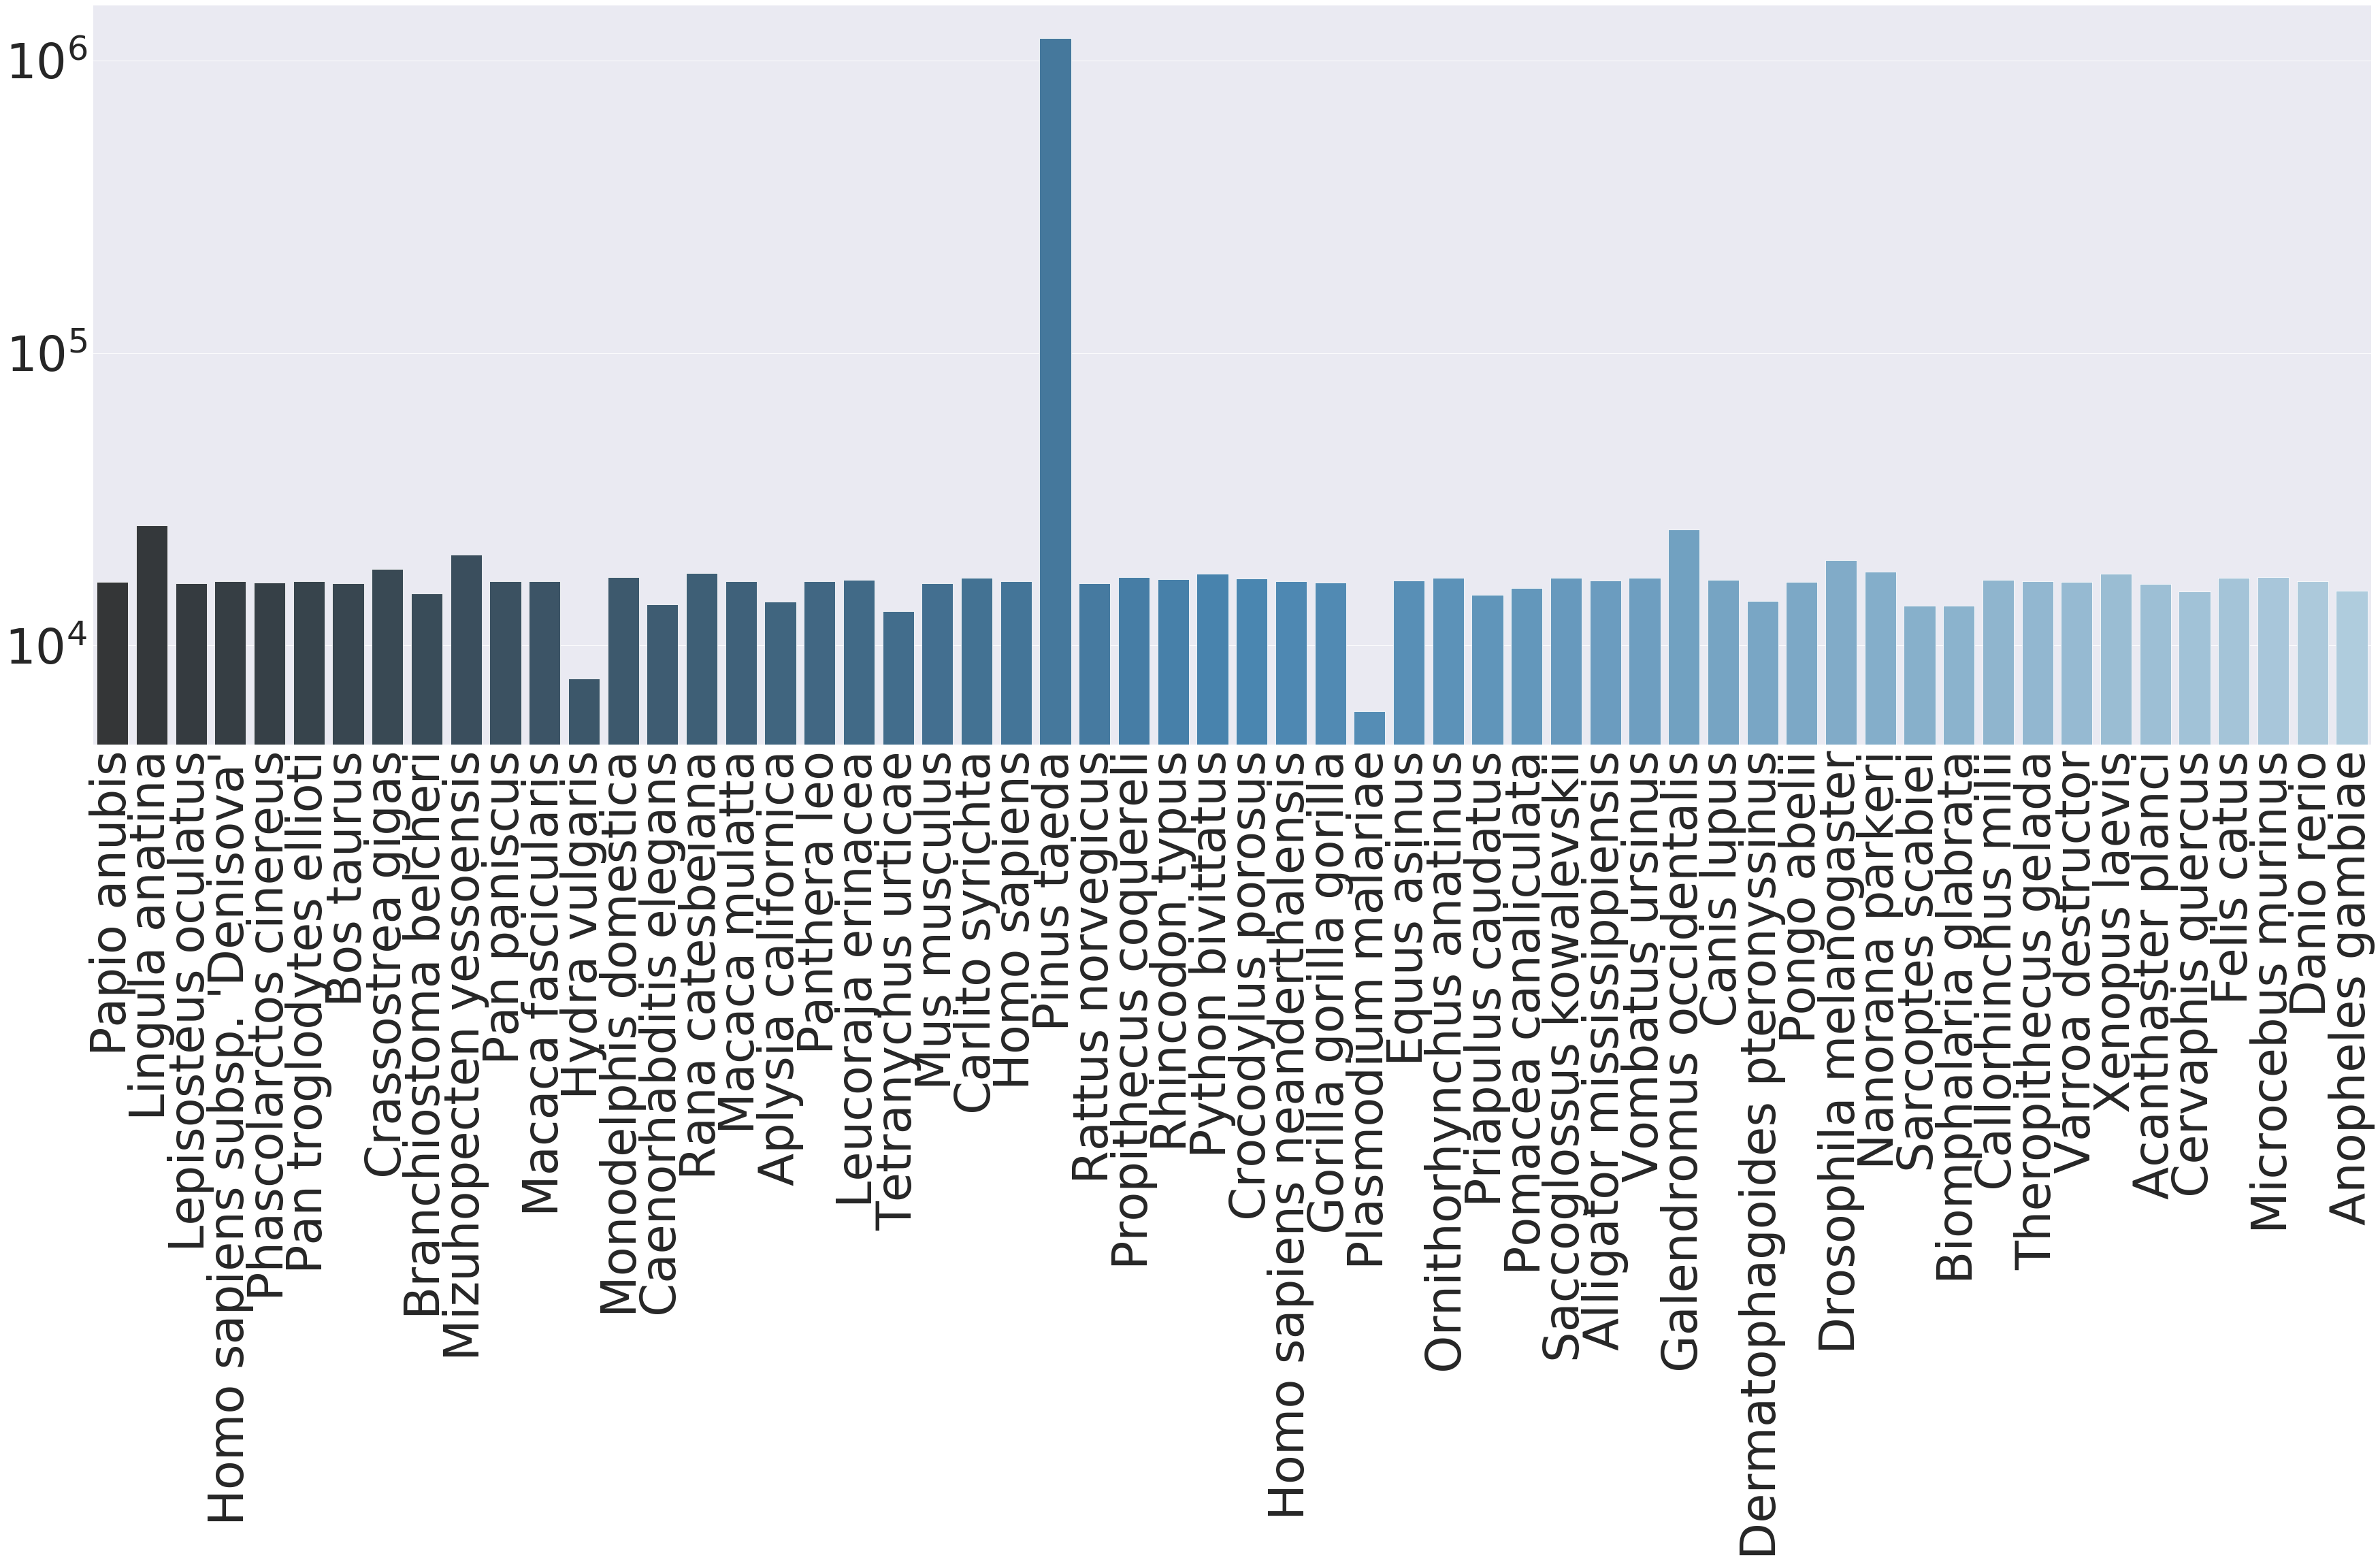

In [493]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(60, 20)
sns.set_context("paper", font_scale=8)

#print(len(x), len(y))
ax = sns.barplot(x=names, y=length_genome, palette="Blues_d")

plt.xticks(rotation='vertical')
plt.yscale('log')
plt.savefig('Bar_plot_genome_size.pdf', dpi=100)


In [561]:
def match_name(name, list_names, min_score=0):
    # -1 score incase we don't get any matches
    max_score = -1
    # Returning empty name for no match as well
    max_name = ""
    # Iternating over all names in the other
    for name2 in list_names:
        #Finding fuzzy match score
        score = fuzz.ratio(name, name2)
        # Checking if we are above our threshold and have a better score
        if (score > min_score) & (score > max_score):
            max_name = name2
            max_score = score
    return (max_name, max_score)

root = "/home/pavel/Desktop/ORF_SMTB/ORF_finder" # os.getcwd() # просто корень, где будем работать
os.chdir(root)

files_in_root = os.listdir(".")
#print(files_in_root)
folders = [x for x in files_in_root if "results_for_" in x]

save_list = []
name_list = []

global_ORF_table = pd.DataFrame()
for folder in folders:
    #print(folder)
    if len(os.listdir(folder)) > 0:
        file_csv = [f for f in os.listdir(folder) if os.path.splitext(f)[1] == '.csv'][0]

        final_table = pd.read_csv(folder + "/" + file_csv, sep='\t')
        

        if final_table.shape[0] != 0:
            final_table = final_table[[True if x != "None" else False for x in list(final_table["Instability index"])]]
        
            final_table = final_table[[True if float(x) < 40 else False for x in list(final_table["Instability index"])]]
        
            #print(final_table["Amino_seq"])
            save_list.append(set(final_table["Amino seq"]))
            name_list.append(folder)

            #print(global_ORF_table.shape[0])
            if global_ORF_table.shape[0] == 0:
                global_ORF_table = final_table
            else:
                global_ORF_table = global_ORF_table.append(final_table) 
                #print(global_ORF_table.shape[0])

 
result_all = []
mat_count = np.full((len(save_list), len(save_list)), None)
mat = np.full((len(save_list), len(save_list)), None)

for i in range(len(save_list)):
    for j in range(len(save_list)):
        if i < j:
            #result = []
            #for orf_seq in save_list[i]:
            #    match = match_name(orf_seq, save_list[j], 95)
            #    if match[1] != -1:
            #        result.append(match[0])
                
            result = save_list[i].intersection(save_list[j])
            #print()
            if len(result) > 0:
                mat[i][j] = result
                mat_count[i][j] = len(result)
                result_all.extend(list(result))

 
def preview_MHC(b_fil):
    b_fil.loc['Sum',:] = b_fil.sum(axis=0)
    b_fil.loc[:,'Sum'] = b_fil.sum(axis=1)
    return b_fil

mat_df = pd.DataFrame(mat)
mat_df.columns = [x.split("results_for_")[1] for x in name_list]
mat_df.index = [x.split("results_for_")[1] for x in name_list]

mat_count_df = pd.DataFrame(mat_count)
mat_count_df.columns = [x.split("results_for_")[1] for x in name_list]
mat_count_df.index = [x.split("results_for_")[1] for x in name_list]


mat_count_df_sum = preview_MHC(mat_count_df)

#mat_count_df_sum = mat_count_df_sum.fillna(0)

print(len(result_all))

5460


In [549]:
sub_global_ORF_table = global_ORF_table[[(fuzz.partial_ratio(x, "GSPPPAGSKKVV") > 98) for x in list(global_ORF_table["Amino seq"])]]
sub_global_ORF_table

,Nuc seq,Amino seq,SD seq,SD score,Frame,ORF start,ORF end,Ama len,GC%,GC fold change,...,Feature strand,Feature start,Feature end,Feature type,Feature product,Organism,Record id,Translation table,Note,Codon start
633,ATGAGGATGTATACTTCTGGGTGGCCGAAGAATCAGAAAAGGTGTT...,MRMYTSGWPKNQKRCWYRIGSPPPAGSKKVVFRFRSVSNMVIPAAR...,AGAGCCAGTCTTTGTTCAAG,0.0,5,5699,6053,118,0.4802,1.0966,...,1,1166,11767,tRNA,tRNA-His,Crocodylus porosus,NC_008143.1,None,None,None
634,ATGTATACTTCTGGGTGGCCGAAGAATCAGAAAAGGTGTTGGTATA...,MYTSGWPKNQKRCWYRIGSPPPAGSKKVVFRFRSVSNMVIPAARTG...,AGTCTTTGTTCAAGTACGAA,0.0,5,5705,6053,116,0.4799,1.0959,...,1,1166,11767,tRNA,tRNA-His,Crocodylus porosus,NC_008143.1,None,None,None
1061,ATTGGGTCTCCTCCTCCTGCGGGGTCAAAGAAGGTGGTGTTC,IGSPPPAGSKKVVF,ATTCATCGTCTGAGCCCACC,0.0,4,871,913,14,0.5714,1.2989,...,1,5328,6885,CDS,cytochrome c oxidase subunit I,Crocodylus porosus,NC_008143.1,2,None,1
438,ATGGGGTCTCCTCCTCCGGCGGGGTCGAAGAAGGTGGTGTTG,MGSPPPAGSKKVVL,AATTGGCTTCCTAGGGTTTA,0.0,4,856,898,14,0.6429,1.3904,...,1,5903,7445,CDS,cytochrome c oxidase subunit I,Homo sapiens,NC_012920.1,2,cytochrome c oxidase I,1
439,ATAGGGTCTCCTCCCCCGGCTGGGTCGAAGAAGGTAGTGTTG,MGSPPPAGSKKVVL,AATTGGCTTCCTAGGGTTTA,0.0,4,856,898,14,0.5952,1.2928,...,1,5321,6863,CDS,cytochrome c oxidase subunit I,Pan troglodytes ellioti,KM679417.1,2,None,1
495,ATGGGATCTCCTCCCCCTGCGGGGTCAAAGAAGGTTGTGTTTAAGT...,MGSPPPAGSKKVVFKLRSVSSIVIPAASTG,GGGTTCATCGTCTGAGCCCA,0.0,5,869,959,30,0.4889,1.1001,...,1,5313,6868,CDS,cytochrome c oxidase subunit I,Alligator mississippiensis,NC_001922.1,2,None,1
470,ATTGGGTCCCCTCCTCCAGCGGGATCAAAGAAAGTTGTGTTT,IGSPPPAGSKKVVF,TGGCTTTCTAGGCTTTATTG,0.0,4,859,901,14,0.5000,1.2541,...,1,5327,6872,CDS,cytochrome c oxidase subunit I,Mus musculus,NC_005089.1,2,cytochrome oxidase subunit 1; cytochrome c oxi...,1
503,ATTGGATCCCCTCCCCCTGCAGGATCGAAGAAGGTGGTGTTTAAGT...,IGSPPPAGSKKVVFKLRSV,TGGCTTCCTAGGCTTCATCG,0.0,4,859,916,19,0.5263,1.2155,...,1,5356,6901,CDS,cytochrome c oxidase subunit I,Equus asinus,NC_001788.1,2,None,1
479,ATGGGGTCTCCCCCTCCTGCGGGGTCAAAGAAGGTAGTATTG,MGSPPPAGSKKVVL,ATTTATCGTCTGAGCCCACC,0.0,4,871,913,14,0.5714,1.3221,...,1,5486,7043,CDS,cytochrome c oxidase subunit I,Lepisosteus oculatus,NC_004744.1,2,None,1
487,ATAGGGTCTCCTCCGCCAGCGGGGTCAAAGAAGGTTGTGTTG,MGSPPPAGSKKVVL,CATCGGATTTCTAGGCTTTA,0.0,4,856,898,14,0.5714,1.3534,...,1,5366,6908,CDS,cytochrome c oxidase subunit I,Carlito syrichta,NC_012774.1,2,None,1


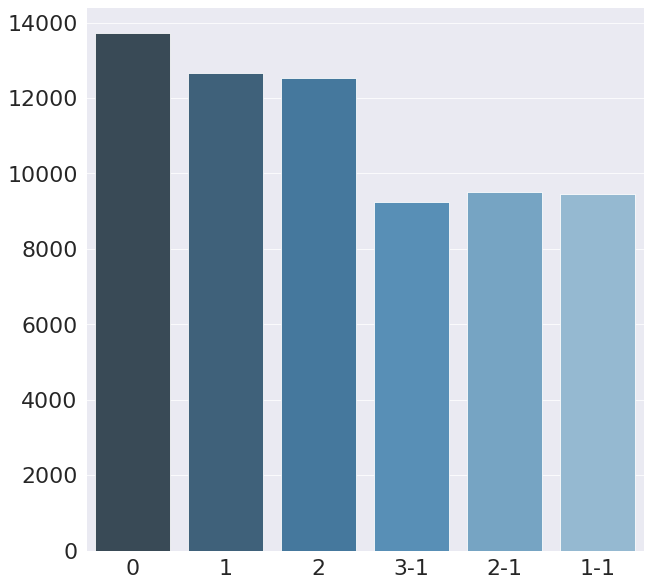

In [546]:
#x=list(collections.Counter(global_ORF_table[global_ORF_table["Feature type"] == "CDS"]["Frame"]).keys())
y=list(collections.Counter(global_ORF_table[global_ORF_table["Feature type"] == "CDS"]["Frame"]).values())
x=["0","1","2","3-1","2-1","1-1"]
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
sns.set_context("paper", font_scale=2.5)


ax = sns.barplot(x=x, y=y, palette="Blues_d")
plt.savefig('Bar_plot1.pdf', dpi=200)


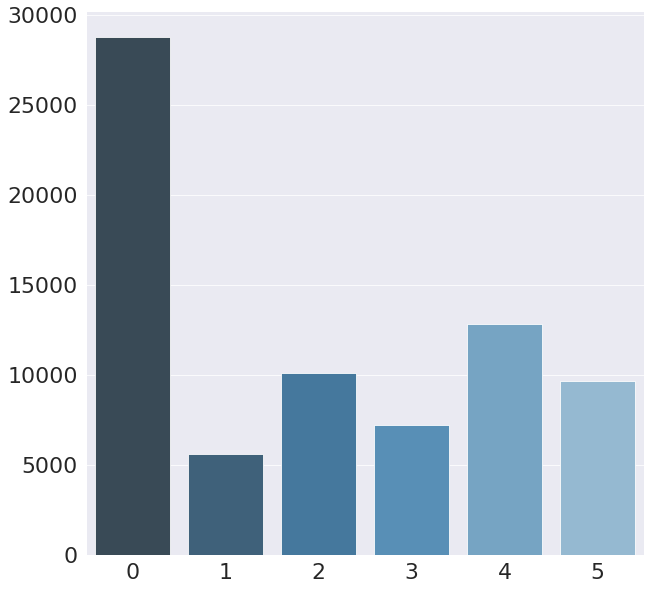

In [496]:
x=list(collections.Counter(global_ORF_table[global_ORF_table["Feature strand"] == 1]["Frame"]).keys())
y=list(collections.Counter(global_ORF_table[global_ORF_table["Feature strand"] == 1]["Frame"]).values())
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
sns.set_context("paper", font_scale=2.5)


ax = sns.barplot(x=x, y=y, palette="Blues_d")
plt.savefig('Bar_plot2.pdf', dpi=200)


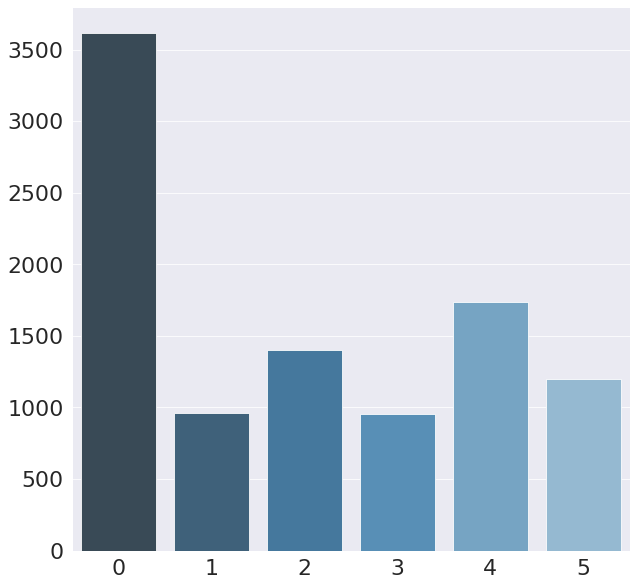

In [497]:
x=list(collections.Counter(global_ORF_table[global_ORF_table["Feature strand"] == -1]["Frame"]).keys())
y=list(collections.Counter(global_ORF_table[global_ORF_table["Feature strand"] == -1]["Frame"]).values())
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
sns.set_context("paper", font_scale=2.5)


ax = sns.barplot(x=x, y=y, palette="Blues_d")
plt.savefig('Bar_plot3.pdf', dpi=200)


<Figure size 432x288 with 0 Axes>

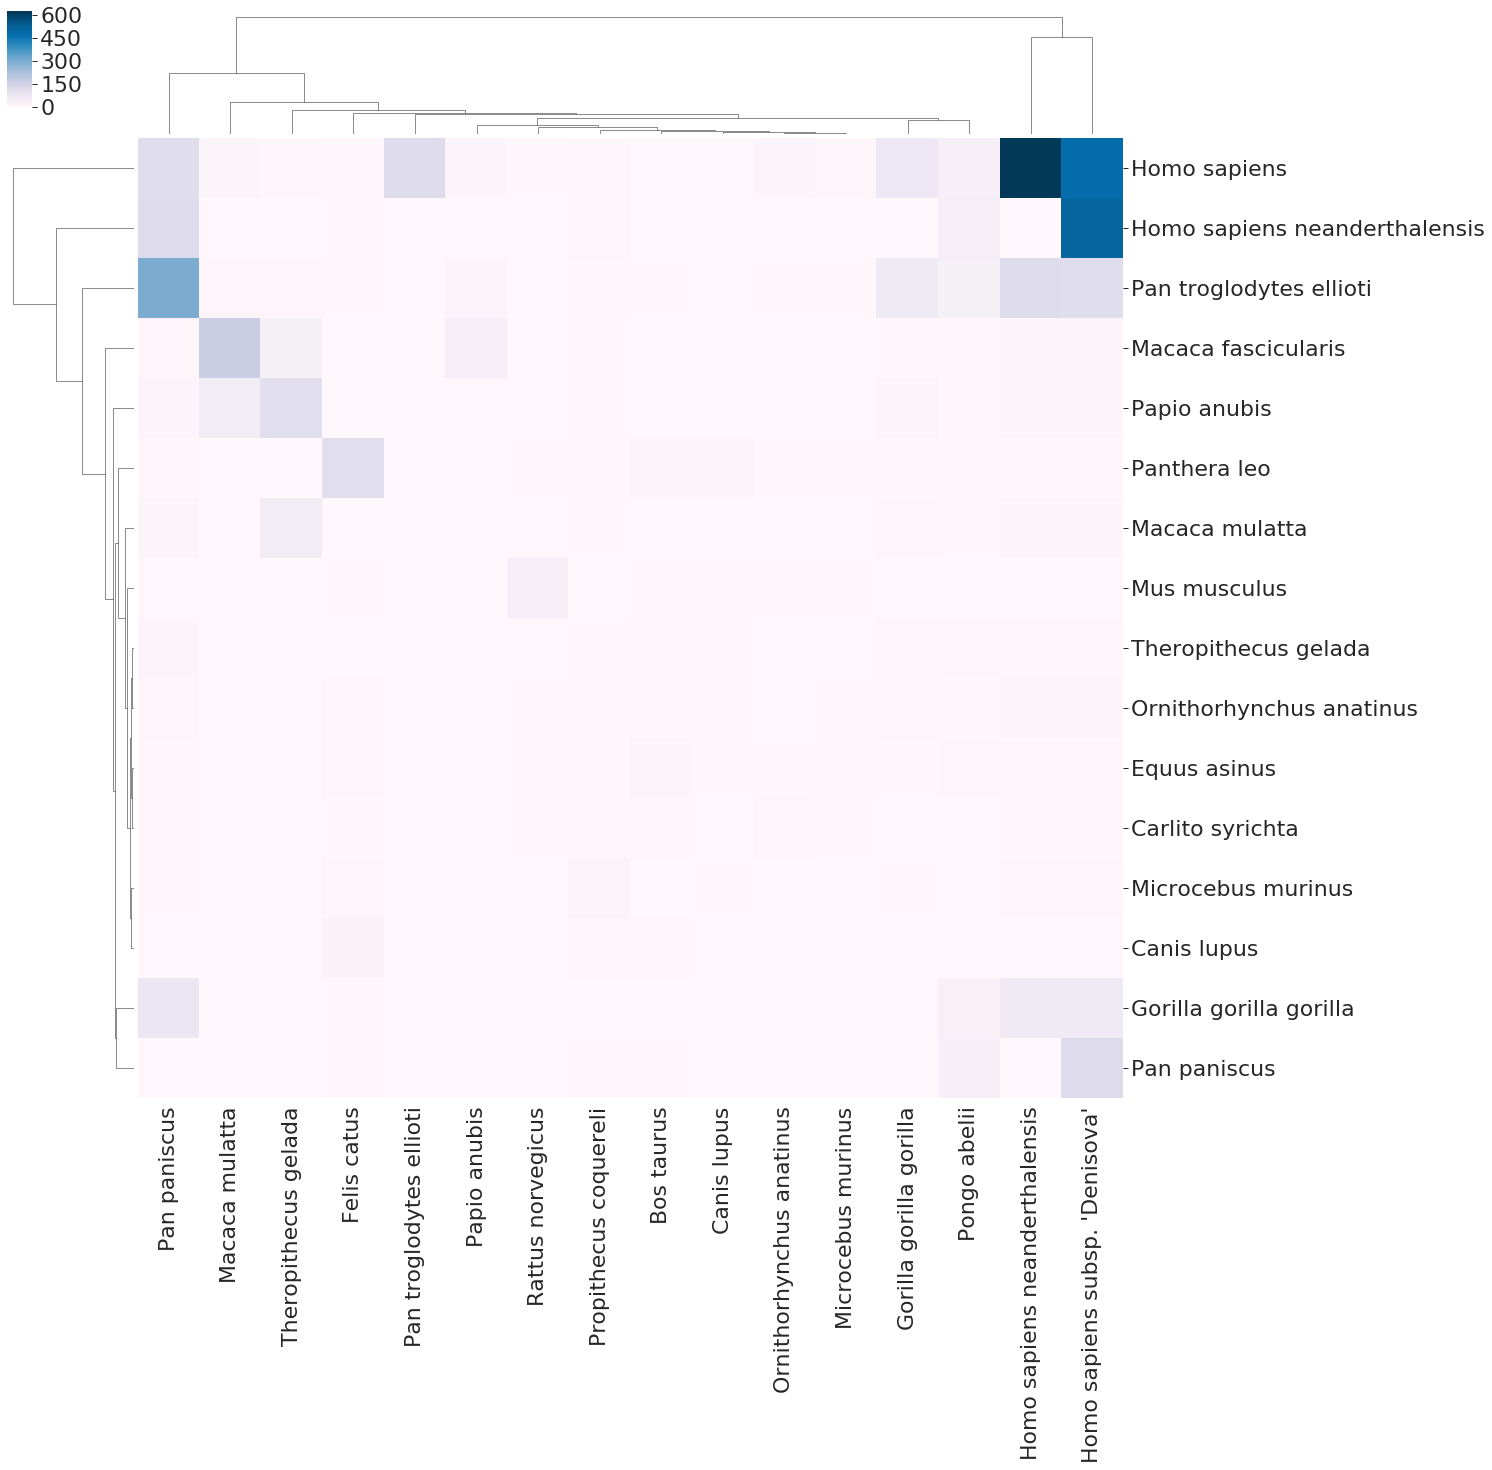

In [498]:
# тепловая карта по полным совпадениям

fig = matplotlib.pyplot.gcf()
sns.set_context("paper", font_scale=2.5)
trashold = 50

mat_count_df_sum_f = mat_count_df_sum[mat_count_df_sum.fillna(0)["Sum"] > trashold]
mat_count_df_sum_f = mat_count_df_sum_f.loc[:,  mat_count_df_sum_f.fillna(0).iloc[-1] > trashold]


sns.clustermap(mat_count_df_sum_f.iloc[:-1,:-1].fillna(0), cmap="PuBu", figsize=(20, 20))
#plt.show()

plt.savefig('Heatmap_exact.png', dpi=200)
                    


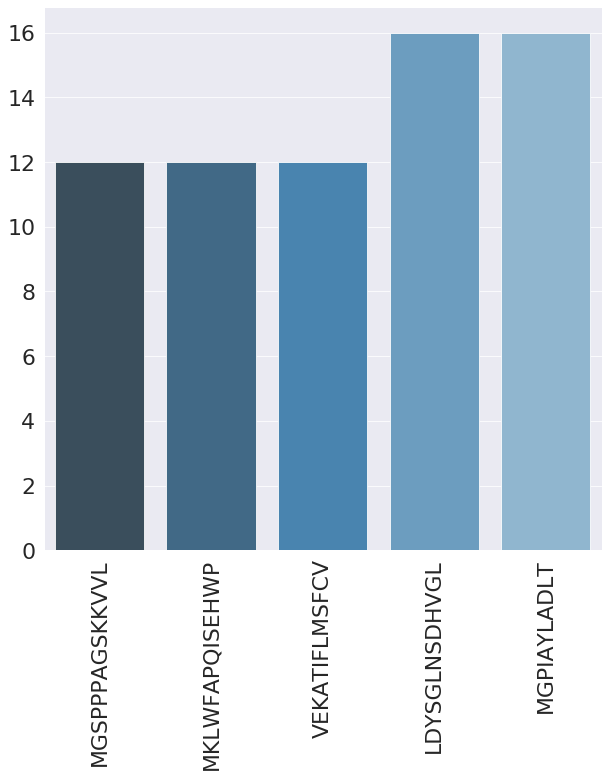

In [562]:
# барплот частоты ORF для всех датасетов

l = list(global_ORF_table[global_ORF_table["Frame"] != 0]["Amino seq"])
#print(len(l))


count_dict = {} 
unique_list = np.unique(np.array(l))

for orf in unique_list:
    num = l.count(orf)
    count_dict[orf] = num
    
#print(list(count_dict.keys())[:10])

sorted_list = sorted(count_dict.items(), key=lambda kv: kv[1])
#print(len(sorted_list))

y = []
labels_all = []
for orf in sorted_list:
    if orf[1] > 10:
        #print(orf)
        labels_all.append(orf[0])
        y.append(orf[1])

x = [x for x in range(len(y))]
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
sns.set_context("paper", font_scale=2.5)

#print(len(x), len(y))
ax = sns.barplot(x=x, y=y, palette="Blues_d")

plt.xticks(x, labels_all, rotation='vertical')
plt.savefig('Bar_plot_all.pdf', dpi=200)

In [563]:
labels_all

['MGSPPPAGSKKVVL',
 'MKLWFAPQISEHWP',
 'VEKATIFLMSFCV',
 'LDYSGLNSDHVGL',
 'MGPIAYLADLT']

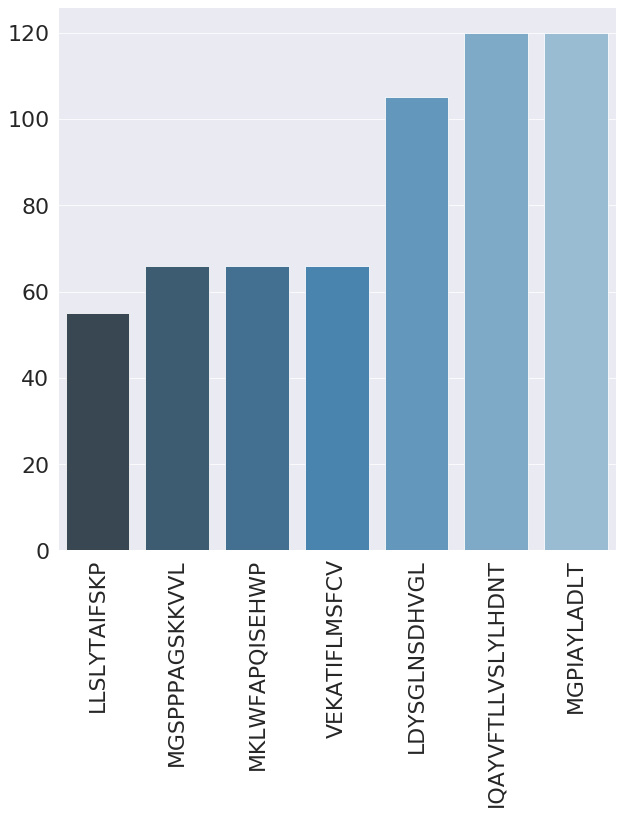

In [564]:
# барплот частоты ORF для точных пересечений

count_dict = {} 
unique_list = np.unique(np.array(result_all))

for orf in unique_list:
    num = result_all.count(orf)
    count_dict[orf] = num
    
#print(count_dict)

sorted_list = sorted(count_dict.items(), key=lambda kv: kv[1])
y = []
labels_exact = []
for orf in sorted_list:
    if orf[1] > 50:
        #print(orf)
        labels_exact.append(orf[0])
        y.append(orf[1])

x = [x for x in range(len(y))]
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
sns.set_context("paper", font_scale=2.5)


ax = sns.barplot(x=x, y=y, palette="Blues_d")

plt.xticks(x, labels_exact, rotation='vertical')
plt.savefig('Bar_plot_exact.pdf', dpi=200)


In [565]:
labels_exact

['LLSLYTAIFSKP',
 'MGSPPPAGSKKVVL',
 'MKLWFAPQISEHWP',
 'VEKATIFLMSFCV',
 'LDYSGLNSDHVGL',
 'IQAYVFTLLVSLYLHDNT',
 'MGPIAYLADLT']

In [505]:
# тепловые карты точного вхождения конкретного ORF

for k in labels_exact:
    mat_best = np.full((len(save_list), len(save_list)), 0)
    for i in range(len(save_list)):
        for j in range(len(save_list)):
            if i < j:  
                
                result = save_list[i].intersection(save_list[j])
                             
                if len(result) != 0:
                    for orf in result:
                        if orf == k:
                            mat_best[i][j] += 1
                            #print(k)

    print(k)
    print("!")
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(100, 100)
    sns.set_context("paper", font_scale=0.5)

    mat_best_df = pd.DataFrame(mat_best)
    mat_best_df.columns = [x.split("results_for_")[1] for x in name_list]
    mat_best_df.index = [x.split("results_for_")[1] for x in name_list]

    grid = sns.clustermap(mat_best_df.fillna(0), metric="cityblock", col_cluster=False, row_cluster=False, cmap="PuBu")
    grid.cax.set_visible(False)
    plt.savefig("Heatmap_mat_best_exact_" + k +".pdf", dpi=100)
    plt.gcf().clear()
    plt.close(fig)
    plt.close('all')
    fig.clear()
    plt.show()



LLSLYTAIFSKP
!
MGSPPPAGSKKVVL
!
MKLWFAPQISEHWP
!
VEKATIFLMSFCV
!
LDYSGLNSDHVGL
!
IQAYVFTLLVSLYLHDNT
!
MGPIAYLADLT
!


In [486]:
def module_fasta_writer(out_file, line):  # модуль для записи в fasta формате 
    start_point = 0 # writes in fasta format by 60 nums in each line
    end_point = 60
    if len(line) > 60:
        len_line = len(line)
        while len_line > 0:
            j = line[start_point:end_point]
            len_line = len_line - 60
            out_file.write(j + "\n")
            start_point = start_point + 60
            end_point = end_point + 60
    else:
        out_file.write(line + "\n")
    

def gap_cleaner(alignment, gap_threshold, codon_position):
    sub_alignment = []
    
    for i in range(0, len(alignment[0])-3, 3):
        col_slice =  alignment[:,i:i+3]
        col_slice = col_slice[:,codon_position]
        #print(col_slice)
        
        gap_count = round(col_slice.count('-')/len(col_slice), round_param)
        #print(gap_count)
        
        if gap_count < gap_threshold:
                sub_alignment.append(col_slice)
    return sub_alignment


def mutation_rate(alignment, file_name, gap_threshold, match):
    for codon_position in range(3):
        print(codon_position)
        c = match
        y = []
        sub_alignment = gap_cleaner(alignment, gap_threshold, codon_position)
        #print(sub_alignment[1])

        x = []
        for col_slice in sub_alignment:
            A_freq = col_slice.count('A')/len(col_slice)
            T_freq = col_slice.count('T')/len(col_slice)
            G_freq = col_slice.count('G')/len(col_slice)
            C_freq = col_slice.count('C')/len(col_slice)
            y.append(max(A_freq, T_freq, G_freq, C_freq))
            x.append(list(collections.Counter(col_slice).keys())[0]+" "+ str(c))
            c += 1
            
        #x = [x for x in range(len(y))]

        fig = matplotlib.pyplot.gcf()
        fig.set_size_inches(100, 10)
        sns.set_context("paper", font_scale=2)
        plt.ylim(0,1)
        plt.xlim(0,len(x))
        plt.title("Conservative landscape for position {codon_position}".format(codon_position=codon_position))
        plt.xlabel('Position')
        plt.ylabel('Conservativity')
        plt.plot(x ,y)
        plt.xticks(rotation=90)
        plt.savefig('{file_name}_conservative_landscape_position_{codon_position}.pdf'.format(file_name=file_name.split(".")[0], codon_position=codon_position), dpi=200)
        plt.gcf().clear()
        #plt.show()
        
        
def consensus_cutter(consensus_seq, alignment_full, file_name, border):
    alignment_consensus = alignment_full[:]
    for al_seq in range(len(alignment_full)):
        #print(alignment_full[al_seq].description)
        if alignment_full[al_seq].description == "template":
            #print(alignment[al_seq])
            names = [str(alignment_full[al_seq].seq)[i:i+len(consensus_seq)] for i in range(0, len(alignment_full[al_seq].seq) - len(consensus_seq))]
            best_match = process.extractOne(consensus_seq, names)
            #print(best_match)
            match = str(alignment_full[al_seq].seq).find(best_match[0])
            #print(match)
            #if len(alignment[al_seq].seq > match + border*2 + len(consensus_seq):
            if match > border and len(alignment_full[al_seq].seq) - match > border:
                alignment_consensus = alignment_consensus[:, match-border:match + len(consensus_seq) + border]
            else:
                alignment_consensus = alignment_consensus[:, match:match + len(consensus_seq)]


    alignment_consensus_file = file_name.split(".")[0] + "_alignment_consensus.fasta"

    with open(alignment_consensus_file, "w") as handle:
        count = SeqIO.write(alignment_consensus, handle, "fasta")
    return alignment_consensus, alignment_consensus_file, match//3

    
def contron_func(consensus_seq, file_name):
    alignment_full = AlignIO.read(file_name, "clustal")
    alignment_consensus = consensus_cutter(consensus_seq, alignment_full, file_name, 10)
    print(alignment_consensus[2])
    mutation_rate(alignment_full, file_name.split(".")[0]+"_full", gap_threshold, 0)
    mutation_rate(alignment_consensus[0], file_name.split(".")[0]+"_consensus", gap_threshold, alignment_consensus[2])


def dnds_gap_cleaner(alignment):
    sub_alignment = ""
    
    for i in range(0, len(alignment[0]), 3):
        codon_slice =  alignment[:,i:i+3]
        #print(codon_slice)
        
        if "-" not in codon_slice[:,0] and "-" not in codon_slice[:,1] and "-" not in codon_slice[:,2] and "N" not in codon_slice[:,0] and "N" not in codon_slice[:,1] and "N" not in codon_slice[:,2] and len(codon_slice[0]) == 3:
            if  sub_alignment == "":
                sub_alignment = codon_slice
            else:
                sub_alignment += codon_slice
    return sub_alignment

def dnds(alignment):
    result_collector = []
    sub_alignment = dnds_gap_cleaner(alignment)

    if sub_alignment != "":
        for i in range(len(sub_alignment)):
            #print(i, "i")
            for j in range(len(sub_alignment)):
                if i < j:
                    #print(j)
                    seq1 = str(sub_alignment[i].seq)
                    seq2 = str(sub_alignment[j].seq)
                    #print(seq1, seq2)
                    seq1 = SeqRecord(CodonSeq(seq1, alphabet=default_codon_alphabet), id="seq1")
                    seq2 = SeqRecord(CodonSeq(seq2, alphabet=default_codon_alphabet), id="seq2")
                    #print(seq1, seq2)
                    dN, dS = cal_dn_ds(seq1, seq2, method="ML")
                    #print(dN/dS)
                    result_collector.append(dN/dS)

    return mean(result_collector)

    

In [552]:
root = "/home/pavel/Desktop/ORF_SMTB/ORF_finder" # os.getcwd() # просто корень, где будем работать
os.chdir(root)

total_orf_results_dir = os.path.abspath('./total_orf_results') # директория для общих файлов
if not os.path.exists(total_orf_results_dir): # если нет basicdir, то создаем
    os.makedirs(total_orf_results_dir)
os.chdir(total_orf_results_dir) # заходим в неё
global_orf_counter = 0
gap_threshold = 0.25
round_param = 4
gap_threshold = 0.25
    
#string_aa = ["" if x is np.nan else x for x in list(global_ORF_table["Amino seq"])]
global_best_ORF_table = pd.DataFrame()

for orf_seq_aa in ["TLTVQRHNHLFLK-GLVMAPRGFSCLLLLTSEIDLPVKRR"]: #["MMTGWPKNQNKCWYKMGSPPPAGSKKVVLLRSVNNMVMPAA", "RRVKVPMRWQEMGYIFYPRKLRPLNLRVEGGFSSKLRVE", "TLTVQRHNHLFLK-GLVMAPRGFSCLLLLTSEIDLPVKRR"]: #labels_all:
    print("orf_seq_aa", orf_seq_aa)
    sub_global_ORF_table = global_ORF_table[[(fuzz.partial_ratio(x, orf_seq_aa) > 90) for x in list(global_ORF_table["Amino seq"])]]
    #print(sub_global_ORF_table)
    orf_nt_seq_list = list(sub_global_ORF_table["Nuc seq"])
    orf_seq_nt = orf_nt_seq_list[0]
    orf_aa_seq_list = list(sub_global_ORF_table["Amino seq"])
    orf_frame_list = list(sub_global_ORF_table["Frame"])
    feature_strand_list = list(sub_global_ORF_table["Feature strand"])
    feature_gene_name = list(sub_global_ORF_table["Feature gene name"])
    feature_start_list = list(sub_global_ORF_table["Feature start"])
    feature_end_list = list(sub_global_ORF_table["Feature end"])
    feature_type_list = list(sub_global_ORF_table["Feature type"])
    feature_product_list = list(sub_global_ORF_table["Feature product"])
    orf_rganism_list = list(sub_global_ORF_table["Organism"])
    translation_table_list = list(sub_global_ORF_table["Translation table"])
    feature_note_list = list(sub_global_ORF_table["Note"])
    genetic_code_table_id = translation_table_list[0]
    

   
    c = 0
    file_fasta_nt_protein = "nt_protein_" + str(global_orf_counter) + orf_seq_aa + ".fasta"
    with open(file_fasta_nt_protein, "w") as out_file:
        out_file.write(">template\n")
        module_fasta_writer(out_file, orf_seq_nt)
        #print(collections.Counter(feature_gene_name), collections.Counter(feature_type_list), collections.Counter(feature_product_list))
        #print(list(collections.Counter(orf_frame_list).keys())[0], list(collections.Counter(feature_strand_list).keys())[0])
                   
        if list(collections.Counter(feature_strand_list).keys())[0] == 1 :
            for gb_record in gb_record_list:
                #print(gb_record.organism)
                for feature in list(gb_record.features.keys()):
                    #print(feature_type_list, feature_gene_name, feature_product_list)
                    #print(gb_record.features[feature].feature_type, gb_record.features[feature].gene, gb_record.features[feature].product)
                    #if (gb_record.features[feature].gene in feature_gene_name and gb_record.features[feature].feature_type in feature_type_list) or gb_record.features[feature].product in feature_product_list:
                    if (gb_record.features[feature].gene == list(collections.Counter(feature_gene_name).keys())[0] and gb_record.features[feature].feature_type == list(collections.Counter(feature_type_list).keys())[0]) or gb_record.features[feature].product == list(collections.Counter(feature_product_list).keys())[0]:
                        #print(gb_record.features[feature])
                        if gb_record.features[feature].strand == 1:
                            #print("OK")
                            out_file.write(">" + "_".join(gb_record.organism.split(" ")).replace("'", "") + "_" + str(c) + "\n")
                            module_fasta_writer(out_file, gb_record.features[feature].feature_biopython.extract(gb_record.sequence))
                            c += 1
        if list(collections.Counter(feature_strand_list).keys())[0] == -1 :
            for gb_record in gb_record_list:
                #print(gb_record.organism)
                for feature in list(gb_record.features.keys()):
                    #print(feature_type_list, feature_gene_name, feature_product_list)
                    #print(gb_record.features[feature].feature_type, gb_record.features[feature].gene, gb_record.features[feature].product)
                    #if (gb_record.features[feature].gene in feature_gene_name and gb_record.features[feature].feature_type in feature_type_list) or gb_record.features[feature].product in feature_product_list:
                    if (gb_record.features[feature].gene == list(collections.Counter(feature_gene_name).keys())[0] and gb_record.features[feature].feature_type == list(collections.Counter(feature_type_list).keys())[0]) or gb_record.features[feature].product == list(collections.Counter(feature_product_list).keys())[0]:
                        #print(gb_record.features[feature])
                        if gb_record.features[feature].strand == -1:
                            #print("OK")
                            out_file.write(">" + "_".join(gb_record.organism.split(" ")).replace("'", "") + "_" + str(c) + "\n")
                            module_fasta_writer(out_file, str(Seq(gb_record.features[feature].feature_biopython.extract(gb_record.sequence), generic_dna).reverse_complement()))
                            c += 1

    p = subprocess.Popen("clustalw {file}".format(file=file_fasta_nt_protein), shell=True)
    p.wait()
    #tree = Phylo.read(file_fasta_aa.split(".")[0] + ".dnd", 'newick')
    #Phylo.draw_ascii(tree)
    print(c) 
    print("Done 1 !")
    contron_func(orf_seq_nt, file_fasta_nt_protein.split(".")[0] + ".aln")

    print("")    
    c = 0
    file_fasta_aa_orf = "processed_nt_to_aa_" + str(global_orf_counter) + orf_seq_aa + ".fasta"
    
    with open(file_fasta_aa_orf, "w") as out_file_aa:
        out_file_aa.write(">template\n")
        module_fasta_writer(out_file_aa, orf_seq_aa)
        
        organisms_list = []
        for gb_record in gb_record_list:
            #print(gb_record.organism)
            for feature in list(gb_record.features.keys()):
                genetic_code_table_id = gb_record.features[feature].transl_table
                if genetic_code_table_id == None:
                    genetic_code_table_id = 1

                if (gb_record.features[feature].gene == list(collections.Counter(feature_gene_name).keys())[0] and gb_record.features[feature].feature_type == list(collections.Counter(feature_type_list).keys())[0]) or gb_record.features[feature].product == list(collections.Counter(feature_product_list).keys())[0]:
                    #print(sub_global_ORF_table.shape[1])
                    # для каждой записи (вида) я ищу в какой рамке нужно читать ORF, чтобы попасть и было красиво..... 
                    frame = list(sub_global_ORF_table[sub_global_ORF_table["Organism"] == gb_record.organism]["Frame"])
                    c += 1
                    #print(frame, len(frame))
                    if len(frame) == 0:
                        continue
                    if len(frame) != 0: 
                        out_file_aa.write(">" + "_".join(gb_record.organism.split(" ")).replace("'", "") + "_" + str(c) + "\n")
                        frame = frame[0]
                        if frame <= 2:
                            sq = gb_record.features[feature].feature_biopython.extract(gb_record.sequence)[frame:]
                            module_fasta_writer(out_file_aa, 
                                                str(Seq(sq, generic_dna).translate(table=genetic_code_table_id,to_stop=False)))
                    
                        if frame > 2:
                            #print(genetic_code_table_id)
                            sq = str(Seq(gb_record.features[feature].feature_biopython.extract(gb_record.sequence), generic_dna).reverse_complement())[frame-3:]
                            module_fasta_writer(out_file_aa, 
                                                str(Seq(sq, generic_dna).translate(table=genetic_code_table_id,to_stop=False)))
                    
                    organisms_list.append(gb_record.organism)
            
            

    p = subprocess.Popen("clustalw {file}".format(file=file_fasta_aa_orf), shell=True)
    p.wait()
    
    print(c)   
    print("Done 2 !")
    global_orf_counter += 1
    sub_global_ORF_table["Found in list of organisms"] = [organisms_list for x in range(sub_global_ORF_table.shape[0])] 
    sub_global_ORF_table["Number of organisms found"] = [len(organisms_list) for x in range(sub_global_ORF_table.shape[0])]
    global_best_ORF_table = global_best_ORF_table.append(sub_global_ORF_table)

global_best_ORF_table.to_csv("global_best_ORF_table.csv", "\t") # сохранили все в csv
 

orf_seq_aa TLTVQRHNHLFLK-GLVMAPRGFSCLLLLTSEIDLPVKRR
33
Done 1 !
355
0
1
2
0
1
2

7
0
7
0
7
1
7
0
7
0
7
0
7
1
7
0
7
0
7
0
7
0
7
0
7
1
7
0
7
0
7
0
7
0
7
0
7
2
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
35
Done 2 !


/home/pavel/anaconda3/lib/python3.7/site-packages/Bio/Seq.py:2715: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)
/home/pavel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/pavel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<Figure size 7200x720 with 0 Axes>

In [556]:
sub_global_ORF_table

,Nuc seq,Amino seq,SD seq,SD score,Frame,ORF start,ORF end,Ama len,GC%,GC fold change,...,Feature end,Feature type,Feature product,Organism,Record id,Translation table,Note,Codon start,Found in list of organisms,Number of organisms found
61,ATGGCTCCACGAGGGTTCAGCTGTCTCTTACTTTTAACCAGTGAAA...,MAPRGFSCLLLLTSEIDLPVKRRA,TTAAATAGGGACCTGTATGA,0.0,2,962,1034,24,0.5278,1.2329,...,3229,rRNA,l-rRNA,Homo sapiens,NC_012920.1,None,16S ribosomal RNA; 16S rRNA,None,"[Homo sapiens subsp. 'Denisova', Pan paniscus,...",4
54,ATGGCTCCACGAGGGTTTAGCTGTCTCTTACTTTCAACCAGTGAAA...,MAPRGFSCLLLSTSEIDLPVKRRA,TTAAATAGGGACTTGTATGA,0.0,2,962,1034,24,0.5139,1.2224,...,2648,rRNA,16S ribosomal RNA,Pan troglodytes ellioti,KM679417.1,None,None,None,"[Homo sapiens subsp. 'Denisova', Pan paniscus,...",4
56,ATGGCTCCACGAGGGTTCAGCTGTCTCTTACTTTTGACCAGTGAAA...,MAPRGFSCLLLLTSEIDLPVKRRT,TTAAATAGGGACTCGTATGA,0.0,2,962,1034,24,0.5278,1.2366,...,2648,rRNA,l-rRNA,Gorilla gorilla gorilla,NC_011120.1,None,16S ribosomal RNA,None,"[Homo sapiens subsp. 'Denisova', Pan paniscus,...",4
57,TTGACCAGTGAAATTGACCTGCCCGTGAAGAGGCGGACA,LTSEIDLPVKRRT,GGTTCAGCTGTCTCTTACTT,0.0,2,995,1034,13,0.5385,1.2617,...,2648,rRNA,l-rRNA,Gorilla gorilla gorilla,NC_011120.1,None,16S ribosomal RNA,None,"[Homo sapiens subsp. 'Denisova', Pan paniscus,...",4
62,ATGGCTCCACGAGGGTTCAGCTGTCTCTTACTTTTAACCAGTGAAA...,MAPRGFSCLLLLTSEIDLPVKRRA,TTAAATAGGGACCTGTATGA,0.0,2,962,1034,24,0.5278,1.2384,...,3232,rRNA,16S ribosomal RNA,Homo sapiens neanderthalensis,KY751400.2,None,None,None,"[Homo sapiens subsp. 'Denisova', Pan paniscus,...",4
38,ATGGCTCCACGAGGGTTTAGCTGTCTCTTACTTTCAACCAGTGAAA...,MAPRGFSCLLLSTSEIDLPVKRRA,TTAAATAGGGACTTGTATGA,0.0,0,963,1035,24,0.5139,1.2140,...,2649,rRNA,l-rRNA,Pan paniscus,NC_001644.1,None,16S ribosomal RNA,None,"[Homo sapiens subsp. 'Denisova', Pan paniscus,...",4
59,ATGGCTCCACGAGGGTTCAGCTGTCTCTTACTTTTAACCAGTGAAA...,MAPRGFSCLLLLTSEIDLPVKRRA,TTAAATAGGGACCTGTATGA,0.0,2,962,1034,24,0.5278,1.2366,...,3225,rRNA,16S ribosomal RNA,Homo sapiens subsp. 'Denisova',KX663333.1,None,None,None,"[Homo sapiens subsp. 'Denisova', Pan paniscus,...",4


In [114]:


#global_ORF_table = pd.read_csv("global_ORF_table.csv")
        
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(global_ORF_table["Amino seq"])
X = X.toarray()


X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(X)

len(X_reduced)

7678

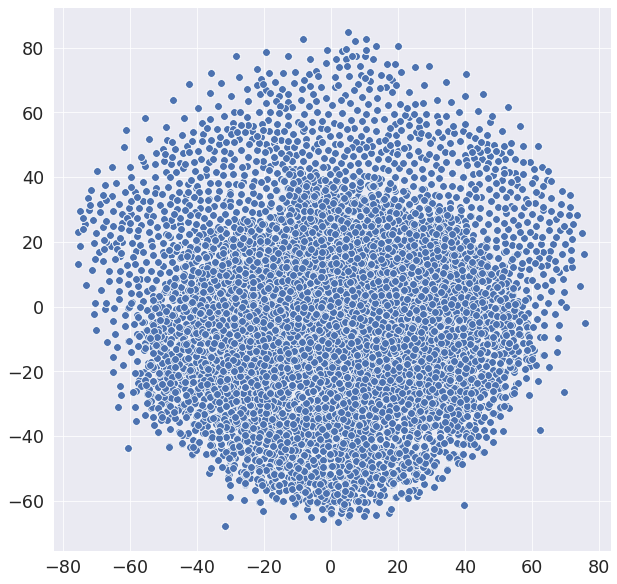

In [116]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
sns.set_context("paper", font_scale=2)


x_tsne = TSNE(n_components=2, random_state=0, perplexity=40, learning_rate=100).fit_transform(X_reduced)
#x_pca = PCA().fit_transform(X_reduced)
#plt.scatter(x[:,0],x[:,1])


ax = sns.scatterplot(x_tsne[:,0],x_tsne[:,1], s=60)
#ax = sns.scatterplot(x_pca[:,0],x_pca[:,1], s=80)




In [159]:
labels_all


['AGTKLTNPGVS',
 'LDQDIPMVQPLLKVRLFND',
 'LEEGDGRCVRASGPCSTKHSTLSLL',
 'LKLLLRICNSI',
 'LVAQNRILVQL',
 'MFNGRGTLTVQR',
 'MLDQDIPMVQPLLKVRLFND',
 'VDRGLSITEQAP',
 'LGLDTPLCLALNLNS',
 'LLSLYTAIFSKP',
 'MVQPLLKVRLFND',
 'AVSRGGVARLSV',
 'TAVSRGGVARLSV']

In [157]:
# labels collector 

for orf_seq_aa in labels_inex:
    print("orf_seq_aa", orf_seq_aa)
    sub_global_ORF_table = global_ORF_table[[(fuzz.partial_ratio(x, orf_seq_aa) > 90) for x in list(global_ORF_table["Amino seq"])]]


['LQNPTLHQLNANQPL',
 'MISIGFLGFIV',
 'AVSRGGVARLSV',
 'LVVQDRILVQL',
 'TAVSRGGVARLSV',
 'MVQPLLKVRLFND',
 'LLSLYTAIFSKP']